<a href="https://colab.research.google.com/github/Moinkhan15-03-2004/2DArray1/blob/main/Breast_Cancer_Wisconsin_Diagnostic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ========================
# 1) Imports and Load Data
# ========================
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing & model selection
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

# imbalance tool (optional)
from imblearn.over_sampling import SMOTE

# deep learning
import tensorflow as tf
from tensorflow import keras

# Load dataset (path may vary)
df = pd.read_csv("/data (1).csv")   # make sure data.csv is in current folder
df.shape, df.columns


((569, 33),
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
       dtype='object'))

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [6]:
print("\nTarget distribution:\n", df['diagnosis'].value_counts())


Target distribution:
 diagnosis
B    357
M    212
Name: count, dtype: int64


In [7]:
df = df.drop(columns=['id'])

# 2) Drop 'Unnamed: 32' column - it contains ONLY NaN values
if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
print("\nTarget distribution:\n", df['diagnosis'].value_counts())


Target distribution:
 diagnosis
B    357
M    212
Name: count, dtype: int64


In [10]:
# 3) Convert diagnosis column to numeric for machine learning
df['target'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 4) Drop original string diagnosis column
df = df.drop(columns=['diagnosis'])

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [11]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [12]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


In [13]:
def evaluate(name, y_true, y_pred, y_prob):
    print(f"\n===== {name} =====")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("ROC AUC  :", roc_auc_score(y_true, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


In [14]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_sc, y_train)

y_pred = lr.predict(X_test_sc)
y_prob = lr.predict_proba(X_test_sc)[:,1]

evaluate("Logistic Regression", y_test, y_pred, y_prob)



===== Logistic Regression =====
Accuracy : 0.9649122807017544
Precision: 0.975
Recall   : 0.9285714285714286
F1 Score : 0.9512195121951219
ROC AUC  : 0.996031746031746
Confusion Matrix:
 [[71  1]
 [ 3 39]]


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)
y_prob = knn.predict_proba(X_test_sc)[:,1]

evaluate("KNN", y_test, y_pred, y_prob)



===== KNN =====
Accuracy : 0.956140350877193
Precision: 0.9743589743589743
Recall   : 0.9047619047619048
F1 Score : 0.9382716049382716
ROC AUC  : 0.982308201058201
Confusion Matrix:
 [[71  1]
 [ 4 38]]


In [16]:
svm = SVC(probability=True, kernel="rbf")
svm.fit(X_train_sc, y_train)

y_pred = svm.predict(X_test_sc)
y_prob = svm.predict_proba(X_test_sc)[:,1]

evaluate("SVM", y_test, y_pred, y_prob)



===== SVM =====
Accuracy : 0.9736842105263158
Precision: 1.0
Recall   : 0.9285714285714286
F1 Score : 0.9629629629629629
ROC AUC  : 0.9947089947089947
Confusion Matrix:
 [[72  0]
 [ 3 39]]


In [17]:
nb = GaussianNB()
nb.fit(X_train_sc, y_train)

y_pred = nb.predict(X_test_sc)
y_prob = nb.predict_proba(X_test_sc)[:,1]

evaluate("Naive Bayes", y_test, y_pred, y_prob)



===== Naive Bayes =====
Accuracy : 0.9210526315789473
Precision: 0.9230769230769231
Recall   : 0.8571428571428571
F1 Score : 0.8888888888888888
ROC AUC  : 0.9890873015873015
Confusion Matrix:
 [[69  3]
 [ 6 36]]


In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

evaluate("Decision Tree", y_test, y_pred, y_prob)



===== Decision Tree =====
Accuracy : 0.9122807017543859
Precision: 0.8809523809523809
Recall   : 0.8809523809523809
F1 Score : 0.8809523809523809
ROC AUC  : 0.9057539682539683
Confusion Matrix:
 [[67  5]
 [ 5 37]]


In [19]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

evaluate("Random Forest", y_test, y_pred, y_prob)



===== Random Forest =====
Accuracy : 0.9736842105263158
Precision: 1.0
Recall   : 0.9285714285714286
F1 Score : 0.9629629629629629
ROC AUC  : 0.9943783068783069
Confusion Matrix:
 [[72  0]
 [ 3 39]]


In [20]:
xg = xgb.XGBClassifier(eval_metric='logloss')
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
y_prob = xg.predict_proba(X_test)[:,1]

evaluate("XGBoost", y_test, y_pred, y_prob)



===== XGBoost =====
Accuracy : 0.9736842105263158
Precision: 1.0
Recall   : 0.9285714285714286
F1 Score : 0.9629629629629629
ROC AUC  : 0.9940476190476191
Confusion Matrix:
 [[72  0]
 [ 3 39]]


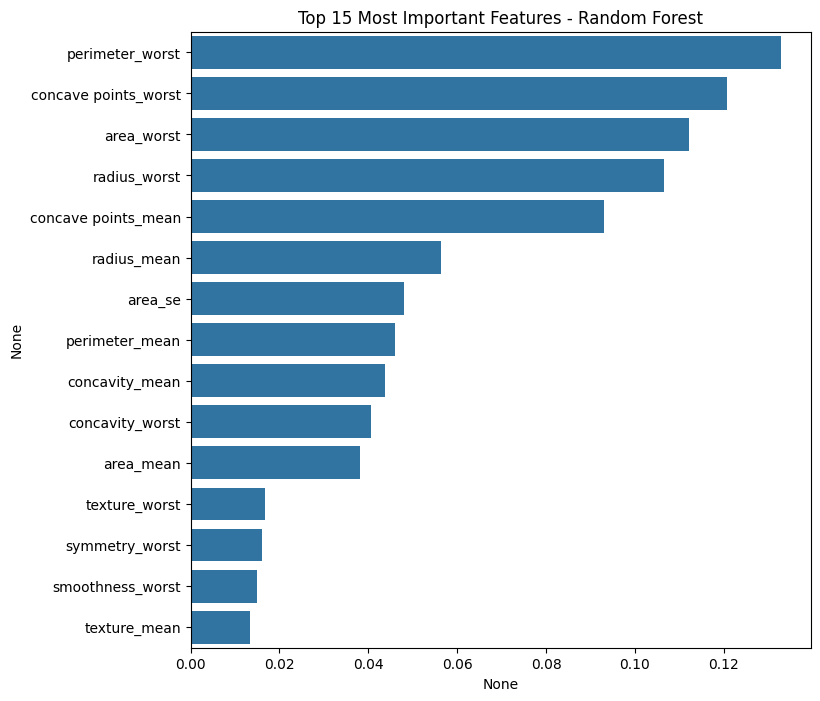

In [21]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(x=feat_imp.head(15), y=feat_imp.head(15).index)
plt.title("Top 15 Most Important Features - Random Forest")
plt.show()


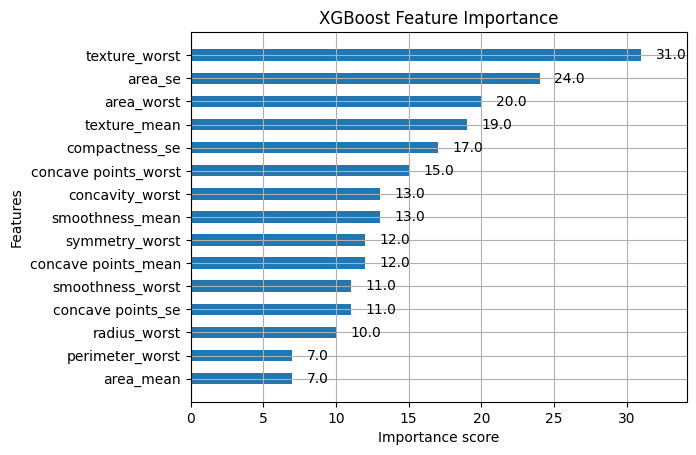

In [22]:
xgb.plot_importance(xg, max_num_features=15, height=0.5)
plt.title("XGBoost Feature Importance")
plt.show()


In [23]:
import shap

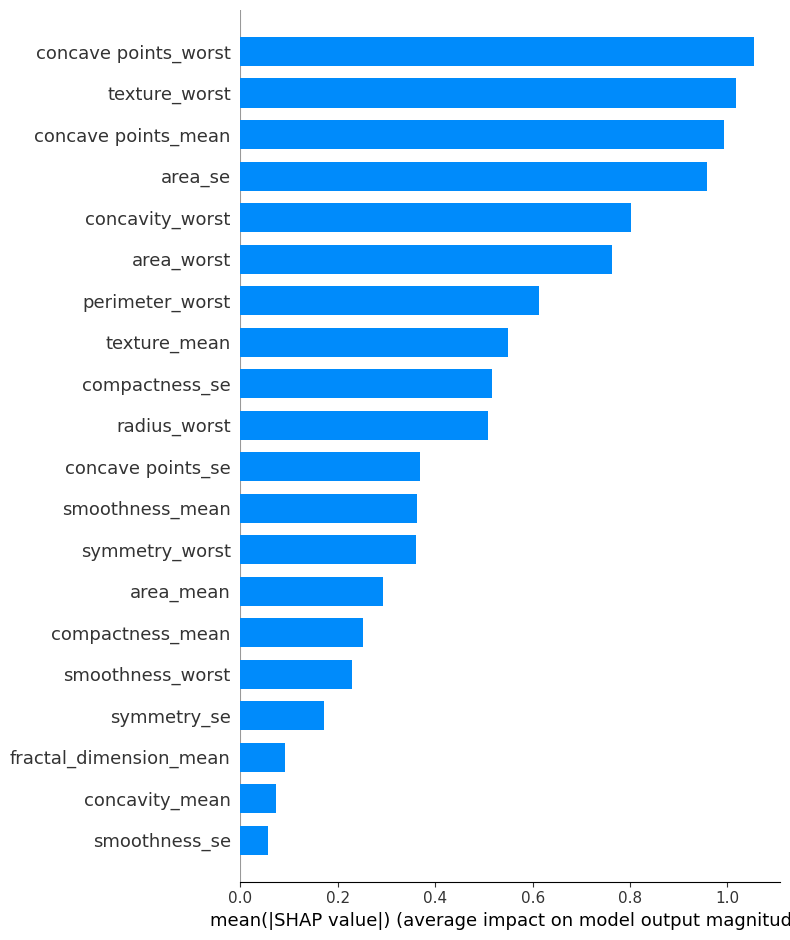

In [24]:
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


In [28]:
results_df = pd.DataFrame(results).set_index("name")
results_df.sort_values("roc_auc", ascending=False)


KeyError: "None of ['name'] are in the columns"

In [29]:
import joblib
joblib.dump(xg, "xgboost_breast_cancer_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [30]:
sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)

prob = xg.predict_proba(sample)[:,1][0]
pred = xg.predict(sample)[0]

print("Predicted Probability of Cancer:", prob)
print("Predicted Class (1=Malignant,0=Benign):", pred)


Predicted Probability of Cancer: 0.0011360911
Predicted Class (1=Malignant,0=Benign): 0
